# Contents 

## 0. Needed Libraries

## 1. Function That Display and Drop Outliers

## 2.1. Example With DataFrame

    2.1.1 Before Drop anything
    
    2.1.2 After Drop Outliers !

## 2.2 Another One with selected Columns
    
    2.2.1 Before Dropping, with Selected columns to Drop
    
    2.2.2 After Dropping , with Selected columns to Display

## 3. Explain
    
    3.1 First block 
    
    3.2 Display Block
    
    3.3 Drop Block
    

# 0. Needed Libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# 1.  Function That Display and Drop Outliers 

In [37]:
def handling_outliers(df , display = False , drop = False , drop_order = 1 ,columns_to_display = [], columns_to_drop = []):
    
    numerical_columns = list((df.select_dtypes(include=np.number)).columns)


    if display == True :
        if (len(columns_to_display) != 0) :
            numerical_columns = columns_to_display
        from math import ceil
        x = ceil(len(numerical_columns)/3)
        if len(numerical_columns) >= 9 :
            plt.figure(figsize=(15,25))
        else : 
            plt.figure(figsize=(24,10))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle("Outliers Detection")
        for i in numerical_columns :
            y =  numerical_columns.index(i) + 1
            ax = plt.subplot(x, 3, y)
            ax = sns.boxplot(x = df[i] ,data = df)
            ax.set_title(i)
            
    if drop == True :
        if (len(columns_to_drop) != 0) :
            numerical_columns = columns_to_drop
        elif drop_order < 1 :
            drop_order = 1
        
        ## If Data Normally distributed so, we will use z-socre to drop outlier
        ## check on data if it normally distributed or skewed 
        import scipy.stats as stats
        
        while drop_order != 0 :
            for col in  numerical_columns :
                p_value = stats.normaltest(df[col])
                if p_value[1] >= .05 :                                      ## col is normally distributed
                    filt = (df[col]-df[col].mean())/df[col].std()
                    indexes = (filt[filt > 3]).index
                    df.drop(indexes , inplace = True )
                    df.reset_index(drop=True , inplace=True)
                
                else :                                                     ## col is Skewed 
            
                    q1 = df[col].quantile(0.25)
                    q3 = df[col].quantile(0.75)
                    iqr = q3 - q1
                    lower = q1 - 1.5*iqr
                    if lower < 0 :
                        lower = 0
                    higher = q3 + 1.5*iqr
                    df = df [df[col] >= lower] 
                    df = df [df[col] <= higher ]
                    df.reset_index(drop=True , inplace=True)
            
            drop_order = drop_order - 1
            
            
    return df

 

# 2.1 Example With DataFrame

In [38]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 2.1.1 Before Drop anything

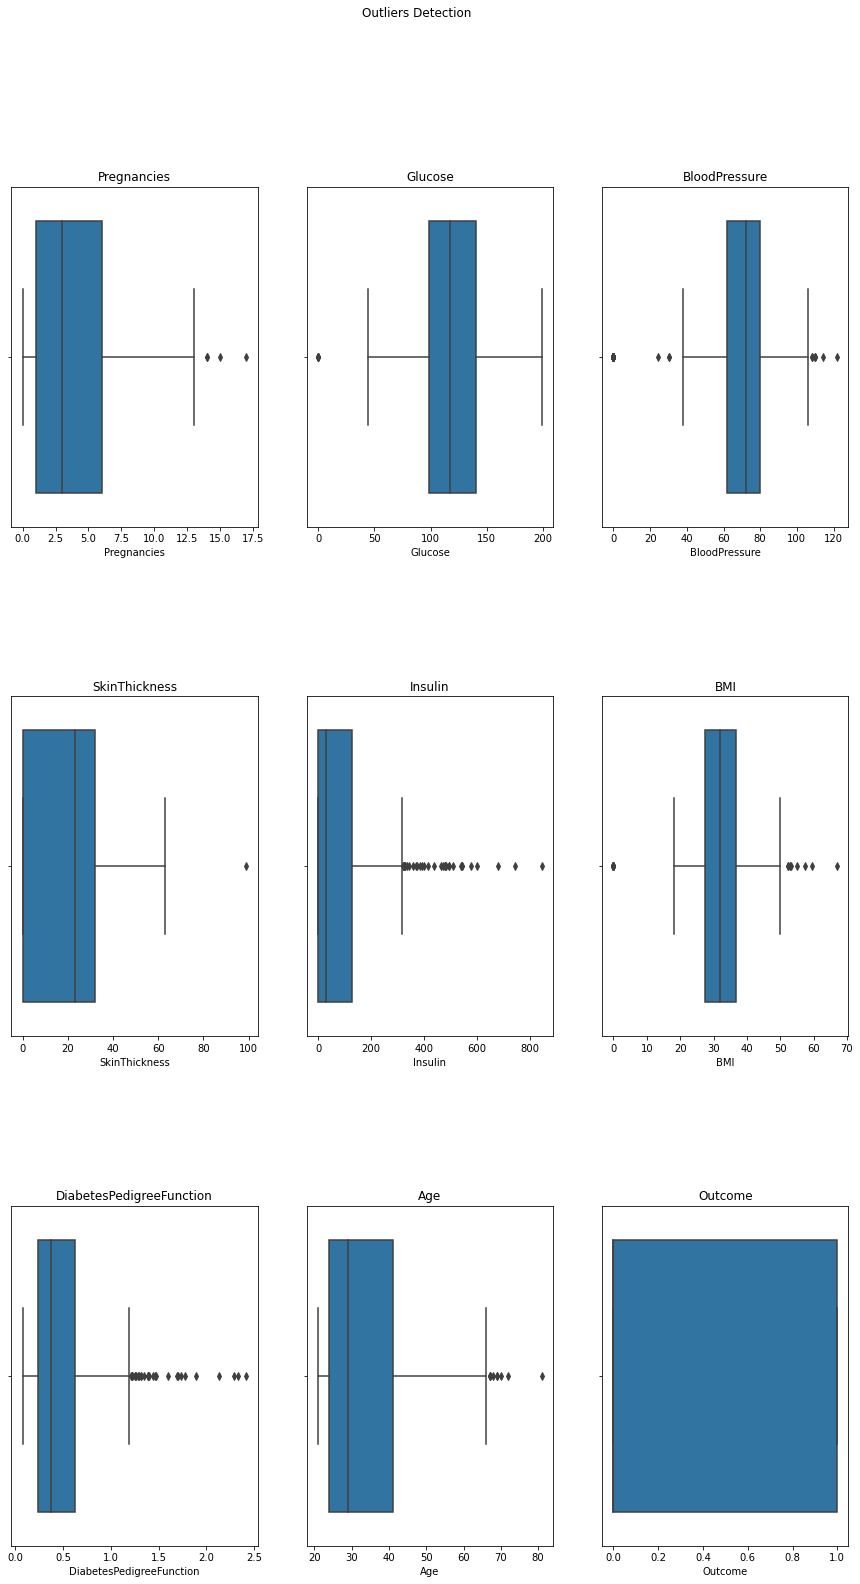

In [39]:
df = handling_outliers(df , display = True , drop = True )

# 2.1.2 After Drop Outliers !

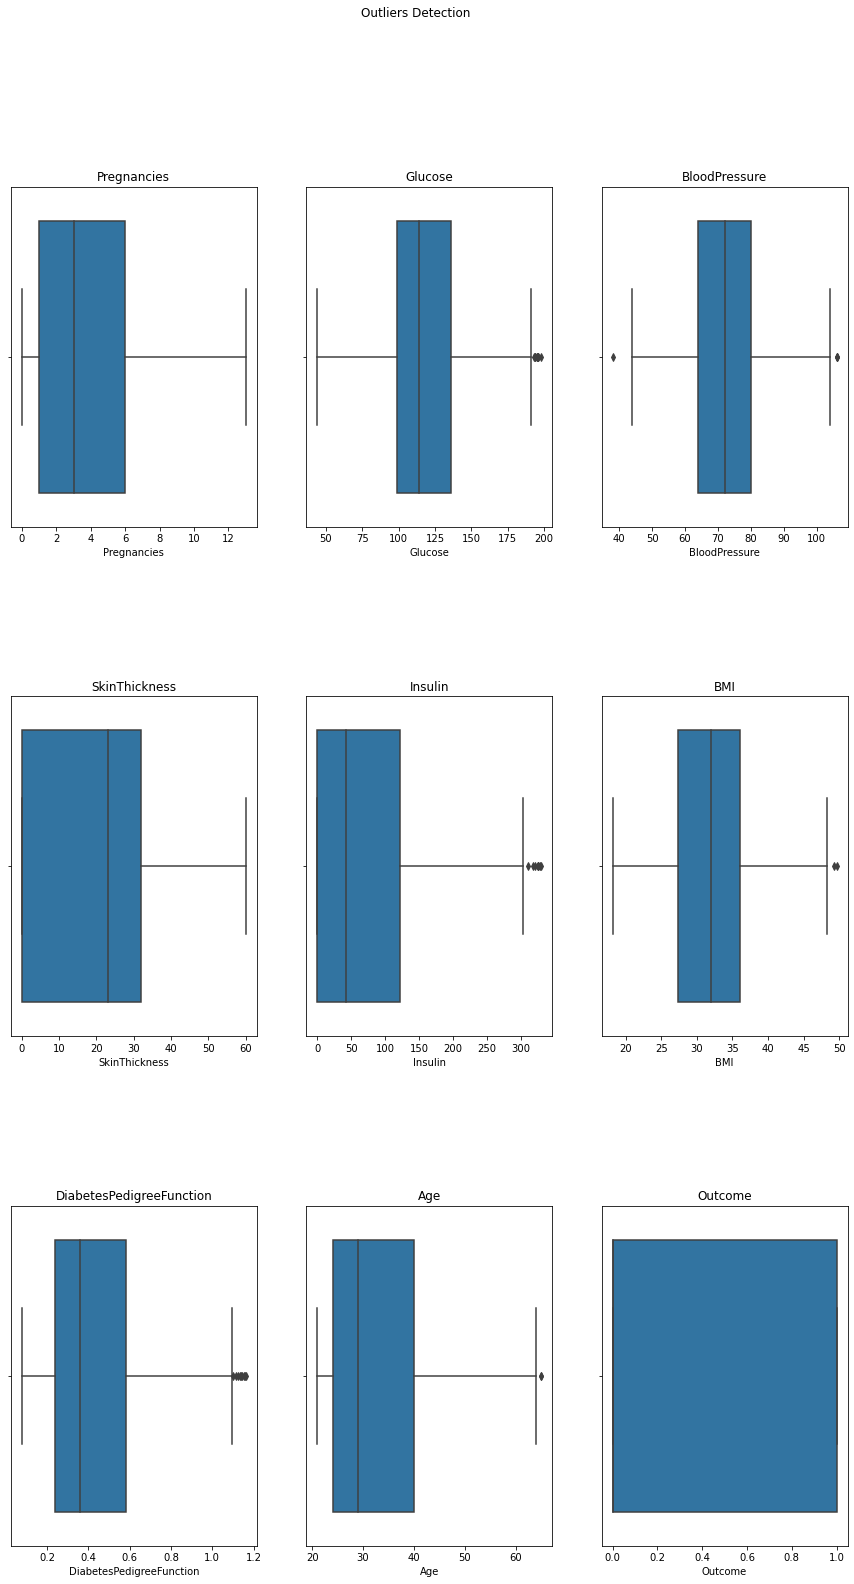

In [40]:
df = handling_outliers(df , display = True )

 We saw that after droping outliers, new is appears 
 
 So, that's why drop_order in use!

# 2.2 Another One with selected Columns

In [41]:
df2 = pd.read_csv('HRDataset.csv')
df2

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


# 2.2.1 Before Dropping, with Selected columns to Drop

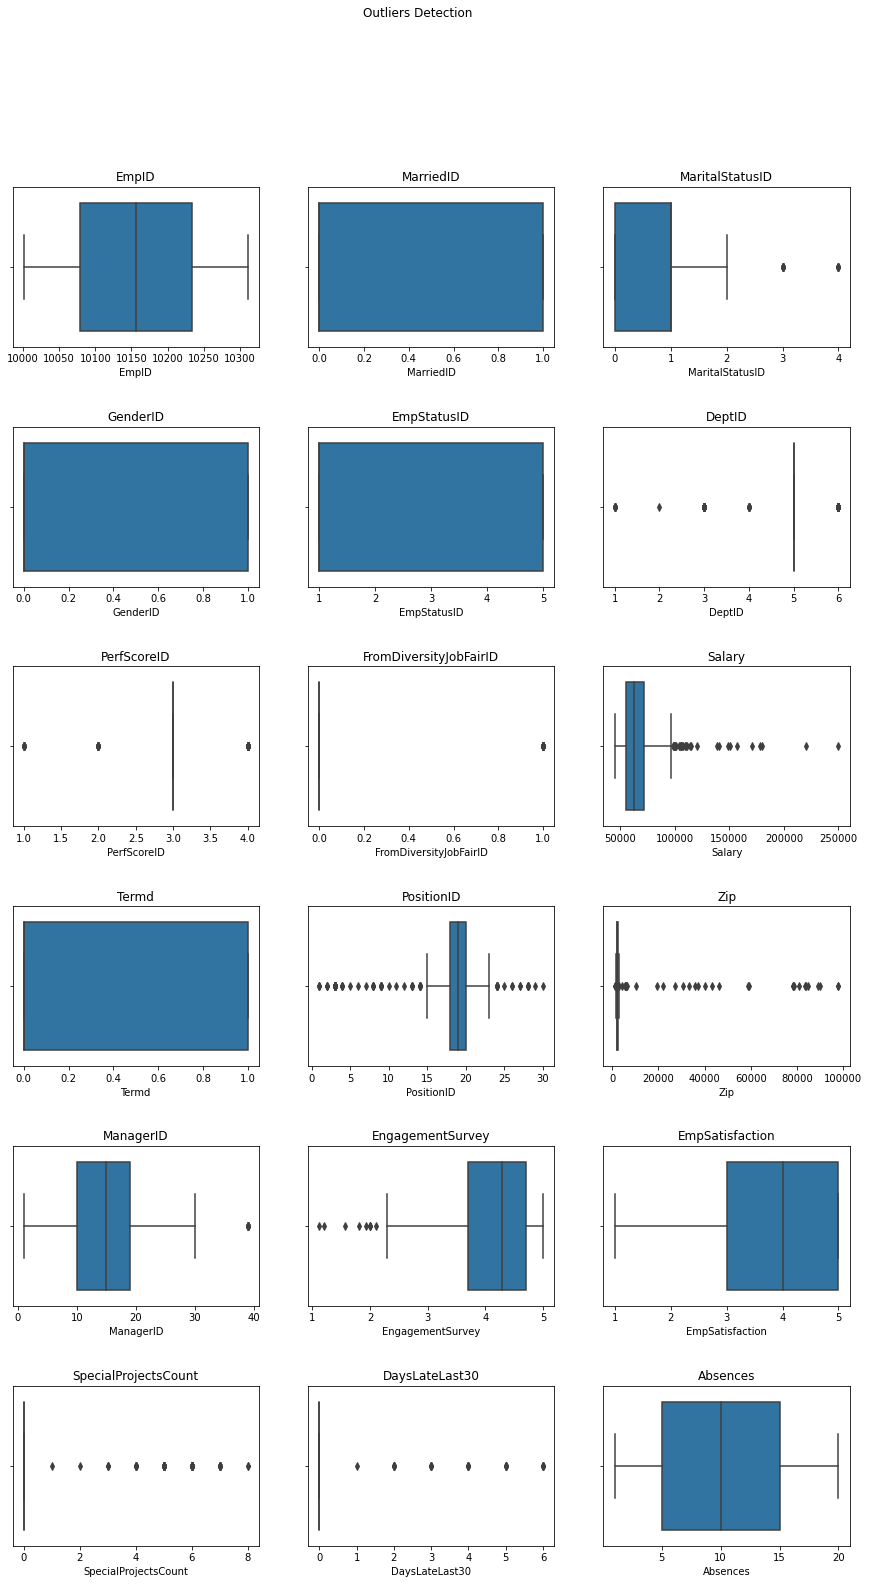

In [42]:
df2 =handling_outliers(df2 , display = True, drop = True , drop_order= 2, 
                       columns_to_drop = ['Salary','PositionID','EngagementSurvey'])

# 2.2.2 After Dropping , with Selected columns to Display

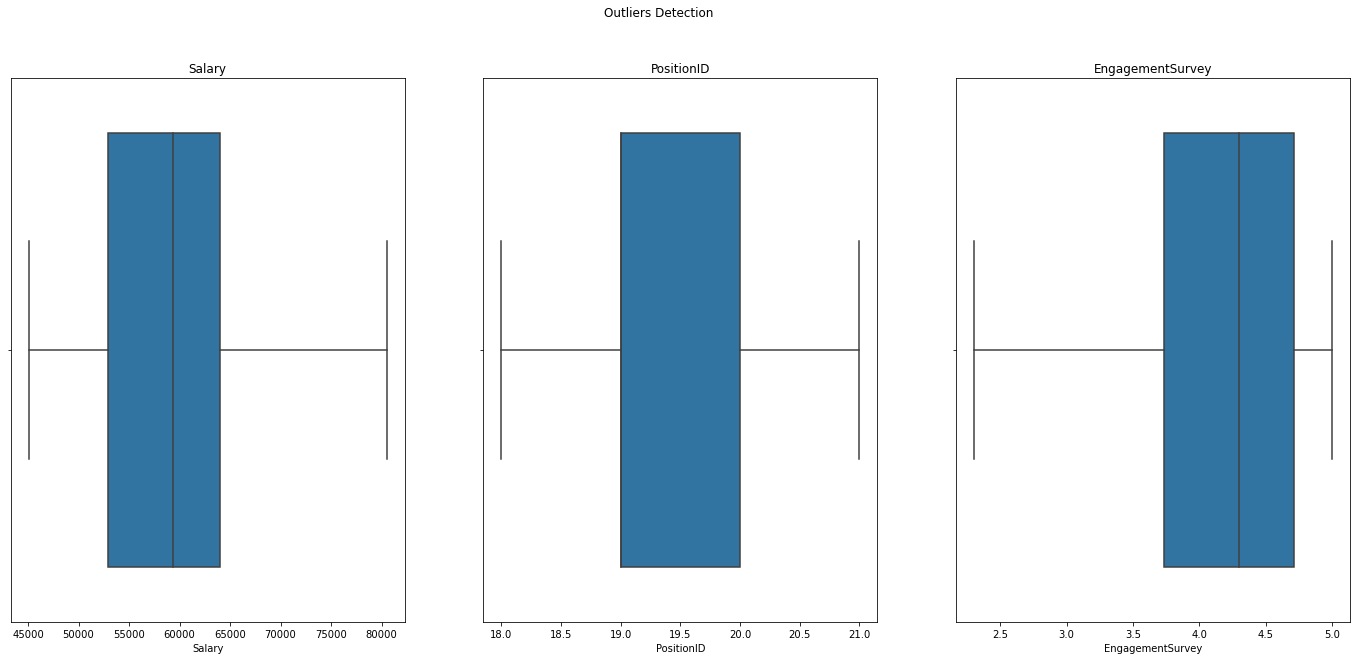

In [43]:
df2 = handling_outliers(df2 , display = True ,  columns_to_display = ['Salary','PositionID','EngagementSurvey'])

# 3. Explain

Function that handle outliers

it takes 6 parameters

df = DataFrame that we work on it

Display = True, if u wanna see a box plot of all numerical columns                 " default = False "

Drop = Ture, if u wanna drop Outliers                                              " default = False "

drop_order = we know that when we drop outliers, the distribution of data will change, that's mean it's possible to appear 
outliers again in the same column! drop_order handling this                       " default = 1 ", drop for one time

columns_to_drop = [List of columns] if u wanna drop specific columns

columns_to_display = [List of columns] if u wanna display specific columns

## --------------------------------------------------------------------------------------------

# 3.1 First block is 

    numerical_columns = list((df.select_dtypes(include=np.number)).columns)
        
If you don't select specific columns to work with, the function selects just numerical columns from DataFrame that u already entered to work with them
## --------------------------------------------------------------------------------------------

# 3.2 Display Block 

    if display == True :
    
        if (len(columns_to_display) != 0) :                    ## 1
            numerical_columns = columns_to_display
            
        from math import ceil                                  ## 2 
        x = ceil(len(numerical_columns)/3)
        if len(numerical_columns) >= 9 :
            plt.figure(figsize=(15,25))
        else : 
            plt.figure(figsize=(24,10))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle("Outliers Detection")
        
        for i in numerical_columns :                           ## 3
            y =  numerical_columns.index(i) + 1
            ax = plt.subplot(x, 3, y)
            ax = sns.boxplot(x = df[i] ,data = df)
            ax.set_title(i)
            
-## 1 : it checks if u work with specific columns or not 
    
-## 2 : its settings display format by calculating possible rows number,
        default columns is 3 " least number to be good to display ", Figure size, Horizontal space "hspace",
        and Title of Visuals "Outliers Detection"
    
-## 3 : loop on numerical_columns and add each one to the subplot then Visuals it
    
## --------------------------------------------------------------------------------------------

## 3.3 Drop Block 

    if drop == True :

            if (len(columns_to_drop) != 0) :                                    ## 1 
                numerical_columns = columns_to_drop

            elif drop_order < 1 :                                               ## 2 
                drop_order = 1


            import scipy.stats as stats                        

            while drop_order != 0 :                                             ## 3
                for col in  numerical_columns :
                    p_value = stats.normaltest(df[col])
                    if p_value[1] >= .05 :                                      ## col is normally distributed
                        filt = (df[col]-df[col].mean())/df[col].std()
                        indexes = (filt[filt > 3]).index
                        df.drop(indexes , inplace = True )
                        df.reset_index(drop=True , inplace=True)

                    else :                                                      ## col is Skewed 

                        q1 = df[col].quantile(0.25)
                        q3 = df[col].quantile(0.75)
                        iqr = q3 - q1
                        lower = q1 - 1.5*iqr
                        if lower < 0 :
                            lower = 0
                        higher = q3 + 1.5*iqr
                        df = df [df[col] >= lower] 
                        df = df [df[col] <= higher ]
                        df.reset_index(drop=True , inplace=True)

                drop_order = drop_order - 1
    
    
    
-## 1 : it checks if u work with specific columns or not
    
-## 2 :it checks if u wanna drop for specific number or just one time, if u enter negative number its drop for one time
    
-## 3 : Dropping Stage, by looping on all columns that we work on it 

        First it checks whether Data distribution is normal or skewed , by D’Agostino’s K-squared test
        returned by kurtosis test and p-value, if p-value is greater than Alpha "0.05" Data is normally, else Data is skewed
        
        second handling each Distribution with its suitable method 
        Normaly ===========> Z-score
        Skewed ============> IQR
        
## --------------------------------------------------------------------------------------------